##### I'm analysing a healthcare-related dataset that tracks patient appointments and whether or not patients showed up for their scheduled appointments. Using VS Code, the first hing I need to do, is to import necessary libraries. I'll be importing pandas for data manipulation, numpy for numerical operations and matplotlib for visualization

Step 1: Import Necessary libraries.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##### Step 2: Load the dataset.

In [2]:
df=pd.read_csv(r"C:\Users\USER\Desktop\Python\healthcare_noshows.csv")

##### I need to clean the dataset to enable me work with clean data and achieve accurate analysis.

##### Step 3: Inspect the dataset.

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

##### My dataset has no null values hence, I can go ahead to analyze.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
# Create age groups
bins = [0, 18, 35, 60, 100]
labels = ['0-18', '19-35', '36-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [10]:
bins

[0, 18, 35, 60, 100]

### Data Analysis

##### 1. Distribution of Patients by Gender and Age Groups

##### Creating Dataframe for Gender, Age distribution

In [22]:
data = {'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Age Group': ['18-30', '18-30', '31-50', '31-50'],
    'Count': [20, 25, 30, 35]}

In [23]:
df= pd.DataFrame(data)

In [24]:
gender_age_distribution = df.pivot_table(index='Gender', columns='Age Group', values='Count', aggfunc='sum')


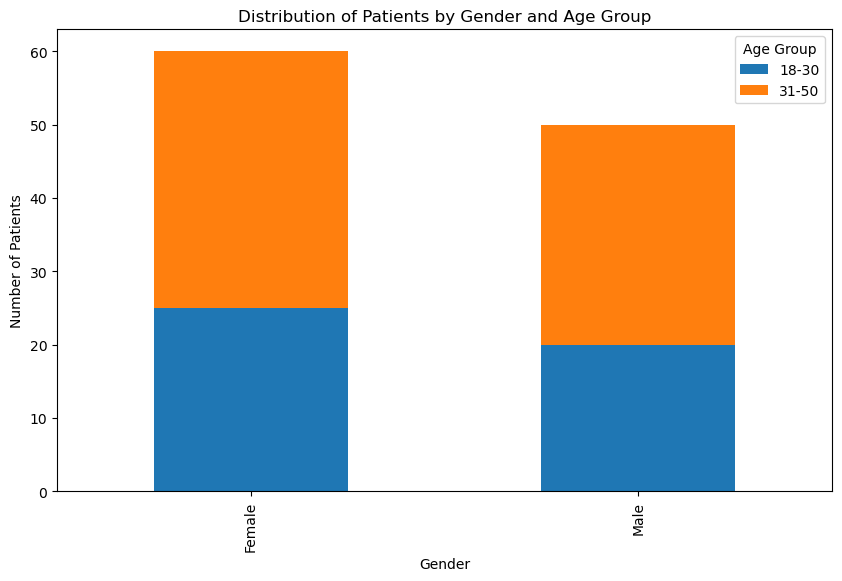

In [25]:
gender_age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Patients by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

##### 2. Neighborhood with Highest and Lowest Number of Patients

In [41]:
# Count patients by neighborhood
neighborhood_counts = df['Neighbourhood'].value_counts()

# Neighborhood with highest and lowest patients
highest_neighborhood = neighborhood_counts.idxmax()
lowest_neighborhood = neighborhood_counts.idxmin()

print(f"Neighborhood with the highest number of patients: {highest_neighborhood} ({neighborhood_counts.max()} patients)")
print(f"Neighborhood with the lowest number of patients: {lowest_neighborhood} ({neighborhood_counts.min()} patients)")

Neighborhood with the highest number of patients: JARDIM CAMBURI (7586 patients)
Neighborhood with the lowest number of patients: PARQUE INDUSTRIAL (1 patients)


##### 3. Average Age of Patients with and without Hypertension

In [43]:
# Average age of patients with and without hypertension
avg_age_hypertension = df.groupby('Hipertension')['Age'].mean()

print(f"Average age of patients with hypertension: {avg_age_hypertension[1]:.2f}")
print(f"Average age of patients without hypertension: {avg_age_hypertension[0]:.2f}")

Average age of patients with hypertension: 60.61
Average age of patients without hypertension: 32.61


C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1746251377.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average age of patients with hypertension: {avg_age_hypertension[1]:.2f}")
C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1746251377.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average age of patients without hypertension: {avg_age_hypertension[0]:.2f}")


##### 4. Average Days Between Scheduled and Appointment Day by Neighborhood


In [77]:
# Calculate days difference
df['DaysDifference'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days

# Average days difference by neighborhood
df.groupby('Neighbourhood')['DaysDifference'].mean().sort_values()

Neighbourhood
PARQUE INDUSTRIAL               0.000000
ILHA DO BOI                     4.142857
NOVA PALESTINA                  4.673032
ILHA DAS CAIEIRAS               4.986275
ESTRELINHA                      5.267790
                                 ...    
MARUÍPE                        16.514209
FONTE GRANDE                   18.089955
JARDIM CAMBURI                 18.687846
SANTA CECÍLIA                  22.054176
ILHAS OCEÂNICAS DE TRINDADE    29.000000
Name: DaysDifference, Length: 81, dtype: float64

In [104]:
# Check the data type of the 'ScheduledDay' column
print(df['ScheduledDay'].dtype)

# Display the first few rows of the 'ScheduledDay' column
print(df['ScheduledDay'].head())

object
0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: ScheduledDay, dtype: object


In [105]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [106]:
print(df['ScheduledDay'].dtype)

datetime64[ns]


In [107]:
# Before conversion (string format)
print(df['ScheduledDay'].head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]


In [109]:
# Convert 'ScheduledDay' to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')

# Check for missing values after conversion
print(df['ScheduledDay'].isnull().sum())

# Verify the data type
print(df['ScheduledDay'].dtype)

# Display the first few rows
print(df['ScheduledDay'].head())

0
datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]


##### 5. Appointments Scheduled on Weekends


In [112]:
df['DayOfWeek'] = df['ScheduledDay'].dt.dayofweek

In [113]:
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [114]:
df['DayOfWeek'] = df['DayOfWeek'].map(day_names)

In [115]:
print(df['DayOfWeek'].head())

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DayOfWeek, dtype: object


In [116]:
# Convert 'ScheduledDay' to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Extract day of the week as integers (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['ScheduledDay'].dt.dayofweek

# Map integers to day names
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_names)

# Verify the 'DayOfWeek' column
print(df['DayOfWeek'].head())

# Count weekend appointments (Saturday and Sunday)
weekend_appointments = df[df['DayOfWeek'].isin(['Saturday', 'Sunday'])].shape[0]
total_appointments = df.shape[0]
weekend_percentage = (weekend_appointments / total_appointments) * 100

print(f"Appointments scheduled on weekends: {weekend_appointments}")
print(f"Percentage of total appointments: {weekend_percentage:.2f}%")

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DayOfWeek, dtype: object
Appointments scheduled on weekends: 22
Percentage of total appointments: 0.02%


##### 6. No-Show Rate on Weekdays vs. Weekends


In [117]:
# Add a column for weekend/weekday
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

# No-show rate by weekend/weekday
no_show_rate = df.groupby('IsWeekend')['Showed_up'].apply(lambda x: (x == False).mean() * 100)

print(f"No-show rate on weekdays: {no_show_rate[False]:.2f}%")
print(f"No-show rate on weekends: {no_show_rate[True]:.2f}%")

No-show rate on weekdays: 20.27%
No-show rate on weekends: 4.55%


In [118]:
# Count the occurrences of each day of the week
day_counts = df['DayOfWeek'].value_counts()

print(day_counts)

DayOfWeek
Tuesday      25280
Wednesday    23544
Monday       22247
Friday       18374
Thursday     17520
Saturday        22
Name: count, dtype: int64


##### 7. Percentage of Diabetic Patients with Hypertension


In [91]:
# Percentage of diabetic patients with hypertension
diabetic_with_hypertension = df[(df['Diabetes'] == 1) & (df['Hipertension'] == 1)].shape[0]
diabetic_total = df[df['Diabetes'] == 1].shape[0]
percentage = (diabetic_with_hypertension / diabetic_total) * 100

print(f"Percentage of diabetic patients with hypertension: {percentage:.2f}%")

Percentage of diabetic patients with hypertension: 81.66%


##### 8. No-Show Rate by Health Condition


In [92]:
# List of health conditions
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

# Calculate no-show rate for each condition
no_show_rates = {}
for condition in conditions:
    no_show_rate = df.groupby(condition)['Showed_up'].apply(lambda x: (x == False).mean() * 100)
    no_show_rates[condition] = no_show_rate

# Print results
for condition, rates in no_show_rates.items():
    print(f"No-show rate for {condition}:")
    print(rates)

No-show rate for Hipertension:
Hipertension
False    21.022234
True     17.301959
Name: Showed_up, dtype: float64
No-show rate for Diabetes:
Diabetes
False    20.445459
True     18.003273
Name: Showed_up, dtype: float64
No-show rate for Alcoholism:
Alcoholism
False    20.267884
True     20.148810
Name: Showed_up, dtype: float64
No-show rate for Handcap:
Handcap
False    20.308935
True     18.169643
Name: Showed_up, dtype: float64


##### 9. Patients with Multiple Health Conditions


In [93]:
# Count patients with multiple conditions
df['MultipleConditions'] = df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum(axis=1)
patients_multiple_conditions = df[df['MultipleConditions'] > 1]

# Average age of these patients
avg_age = patients_multiple_conditions['Age'].mean()

print(f"Number of patients with multiple health conditions: {patients_multiple_conditions.shape[0]}")
print(f"Average age of these patients: {avg_age:.2f}")

Number of patients with multiple health conditions: 8289
Average age of these patients: 62.16


##### 10. No-Show Rate by SMS Reminder


In [94]:
# No-show rate for patients who received SMS vs. those who did not
no_show_rate_sms = df.groupby('SMS_received')['Showed_up'].apply(lambda x: (x == False).mean() * 100)

print(f"No-show rate for patients who received SMS: {no_show_rate_sms[1]:.2f}%")
print(f"No-show rate for patients who did not receive SMS: {no_show_rate_sms[0]:.2f}%")

No-show rate for patients who received SMS: 27.67%
No-show rate for patients who did not receive SMS: 16.73%


C:\Users\USER\AppData\Local\Temp\ipykernel_14152\3769308210.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No-show rate for patients who received SMS: {no_show_rate_sms[1]:.2f}%")
C:\Users\USER\AppData\Local\Temp\ipykernel_14152\3769308210.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No-show rate for patients who did not receive SMS: {no_show_rate_sms[0]:.2f}%")


##### 11. No-Show Rate by Age Group for Patients with SMS Reminders


In [96]:
# Filter patients who received SMS
sms_received = df[df['SMS_received'] == 1]

# No-show rate by age group
sms_received.groupby('AgeGroup')['Showed_up'].apply(lambda x: (x == False).mean() * 100)


C:\Users\USER\AppData\Local\Temp\ipykernel_14152\3767705633.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sms_received.groupby('AgeGroup')['Showed_up'].apply(lambda x: (x == False).mean() * 100)


AgeGroup
0-18     31.342691
19-35    33.995904
36-60    25.396825
61+      19.230142
Name: Showed_up, dtype: float64

##### 12. Show-Up Rate for Patients with SMS Reminders


In [97]:
# Show-up rate for patients who received SMS
show_up_rate_sms = sms_received['Showed_up'].mean() * 100

# Overall show-up rate
overall_show_up_rate = df['Showed_up'].mean() * 100

print(f"Show-up rate for patients who received SMS: {show_up_rate_sms:.2f}%")
print(f"Overall show-up rate: {overall_show_up_rate:.2f}%")

Show-up rate for patients who received SMS: 72.33%
Overall show-up rate: 79.74%


##### 13. No-Show Rate by Scholarship Status


In [98]:
# No-show rate by scholarship status
no_show_rate_scholarship = df.groupby('Scholarship')['Showed_up'].apply(lambda x: (x == False).mean() * 100)

print(f"No-show rate for patients with scholarships: {no_show_rate_scholarship[1]:.2f}%")
print(f"No-show rate for patients without scholarships: {no_show_rate_scholarship[0]:.2f}%")

No-show rate for patients with scholarships: 23.79%
No-show rate for patients without scholarships: 19.87%


C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1046628259.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No-show rate for patients with scholarships: {no_show_rate_scholarship[1]:.2f}%")
C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1046628259.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"No-show rate for patients without scholarships: {no_show_rate_scholarship[0]:.2f}%")


##### 14. Distribution of Health Conditions by Scholarship Status


In [102]:
# Group by scholarship status and calculate the percentage of each condition
df.groupby('Scholarship')[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].mean() * 100



,Hipertension,Diabetes,Alcoholism,Handcap
Scholarship,,,,
False,20.708478,7.667034,2.944540,2.143941
True,17.429920,5.264132,4.884818,1.646776


##### 15. Average Age by Scholarship Status


In [103]:
# Average age by scholarship status
avg_age_scholarship = df.groupby('Scholarship')['Age'].mean()

print(f"Average age of patients with scholarships: {avg_age_scholarship[1]:.2f}")
print(f"Average age of patients without scholarships: {avg_age_scholarship[0]:.2f}")

Average age of patients with scholarships: 30.76
Average age of patients without scholarships: 39.16


C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1190057862.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average age of patients with scholarships: {avg_age_scholarship[1]:.2f}")
C:\Users\USER\AppData\Local\Temp\ipykernel_14152\1190057862.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Average age of patients without scholarships: {avg_age_scholarship[0]:.2f}")
